In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

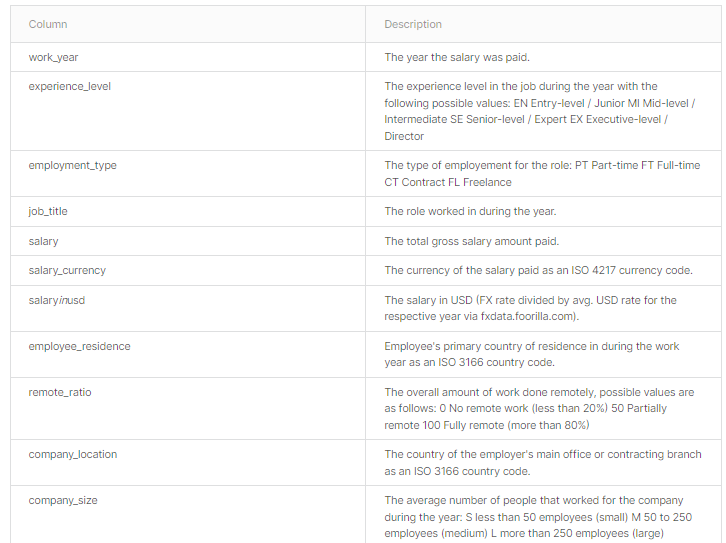

In [2]:
df=pd.read_csv("ds_salaries.csv")

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [5]:
df.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M
599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M
600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M
601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [9]:
df["job_title"].value_counts(normalize=True)

Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Big Data Engineer                           0.013180
Machine Learning Scientist                  0.013180
Principal Data Scientist                    0.011532
AI Scientist                                0.011532
Data Science Consultant                     0.011532
Director of Data Science                    0.011532
Data Analytics Manager                      0.011532
ML Engineer                                 0.009885
Computer Vision Engineer                    0.009885
BI Data Analyst                             0.009885
Lead Data Engineer                          0.009885
Data Engineering Manager                    0.

In [10]:
df = df.replace({'EN': 'Entry-level', 'SE': 'Senior-level', 'EX':'Expert', 'MI':'Mid-level',
           'PT': 'Part-time', 'FT':'Full-time', 'CT':'Contract', 'FL':'Freelance'})


In [11]:
df = df.replace({'ML Engineer': 'Machine Learning Engineer', 
                   'BI Data Analyst' : 'Big Data Engineer', 
                   'Data Analytics Engineer': 'Data Analyst', 
                   'Head of Machine Learning':'Machine Learning Manager', 
                   'Lead Machine Learning Engineer':'Machine Learning Manager',
                   'Staff Data Scientist':'Data Scientist',
                   'Big Data Architect':'Big Data Engineer',
                   'Data Analytics Lead':'Data Analytics Manager', 
                   'Lead Data Scientist':'Head of Data Science',
                   'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                   'Data Specialist':'Data Scientist',
                   'Marketing Data Analyst':'Data Analyst',
                   'Finance Data Analyst':'Data Analyst',
                   'Financial Data Analyst':'Data Analyst',
                   'Product Data Analyst':'Data Analyst',
                   '3D Computer Vision Researcher':'Computer Vision Engineer',
                   'Computer Vision Software Engineer':'Computer Vision Engineer',
                   'NLP Engineer':'Data Scientist',
                   'Applied Machine Learning Scientist': 'Machine Learning Engineer', 
                   'ETL Developer':'Data Architect','Principal Data Analyst':'Lead Data Analyst'})

In [12]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid-level,Full-time,Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,Entry-level,Full-time,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,Senior-level,Full-time,Head of Data Science,190000,USD,190000,US,100,US,S
7,2020,Mid-level,Full-time,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,Mid-level,Full-time,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,Senior-level,Full-time,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [13]:
sort_job = df.sort_values(by = ['salary_in_usd'], ascending = False)

In [14]:
sort_job.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,Expert,Full-time,Principal Data Engineer,600000,USD,600000,US,100,US,L
97,2021,Mid-level,Full-time,Data Analyst,450000,USD,450000,US,100,US,L
33,2020,Mid-level,Full-time,Research Scientist,450000,USD,450000,US,0,US,M
157,2021,Mid-level,Full-time,Machine Learning Engineer,423000,USD,423000,US,50,US,L
225,2021,Expert,Contract,Principal Data Scientist,416000,USD,416000,US,100,US,S
63,2020,Senior-level,Full-time,Data Scientist,412000,USD,412000,US,100,US,L
523,2022,Senior-level,Full-time,Data Analytics Manager,405000,USD,405000,US,100,US,L
519,2022,Senior-level,Full-time,Applied Data Scientist,380000,USD,380000,US,100,US,L
25,2020,Expert,Full-time,Director of Data Science,325000,USD,325000,US,100,US,L
482,2022,Expert,Full-time,Data Engineer,324000,USD,324000,US,100,US,M


In [15]:
sort_job.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
15,2020,Mid-level,Full-time,Data Analyst,8000,USD,8000,PK,50,PK,L
21,2020,Mid-level,Full-time,Data Analyst,450000,INR,6072,IN,100,IN,L
50,2020,Entry-level,Full-time,Data Analyst,450000,INR,6072,IN,0,IN,S
213,2021,Entry-level,Full-time,Big Data Engineer,435000,INR,5882,IN,0,CH,L
18,2020,Entry-level,Full-time,Data Science Consultant,423000,INR,5707,IN,50,IN,M
179,2021,Mid-level,Full-time,Data Scientist,420000,INR,5679,IN,100,US,S
77,2021,Mid-level,Part-time,Computer Vision Engineer,400000,INR,5409,IN,50,IN,M
238,2021,Entry-level,Full-time,Data Scientist,4000,USD,4000,VN,0,VN,M
185,2021,Mid-level,Full-time,Data Engineer,4000,USD,4000,IR,100,IR,M
176,2021,Mid-level,Full-time,Data Scientist,58000,MXN,2859,MX,0,MX,S


## EN ÇOK KAZANAN 10 MESLEK

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

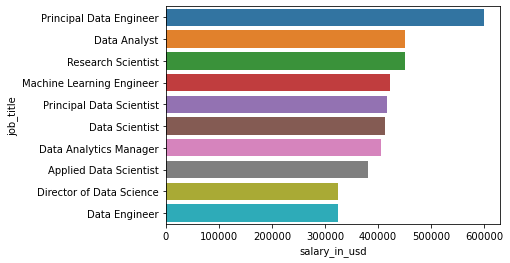

In [16]:
sns.barplot(x = sort_job["salary_in_usd"][:10] , y = sort_job["job_title"][:10])

In [17]:
df_comp = df.groupby("company_location")
df_comp_sayi = pd.DataFrame(df_comp.size().sort_values(ascending=False), 
                           columns = ["Sayı"])


In [18]:
df_comp_sayi.head(20)

,Sayı
company_location,
US,355
GB,47
CA,30
DE,28
IN,24
FR,15
ES,14
GR,11
JP,6


## EN ÇOK DATA SCIENTIST VB. CALISTIRAN 10 ULKE

<AxesSubplot:xlabel='Sayı', ylabel='company_location'>

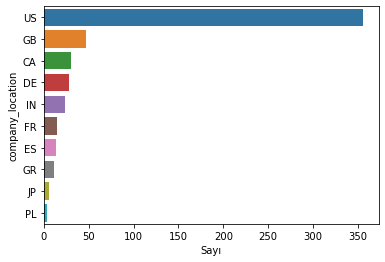

In [19]:
sns.barplot(x = df_comp_sayi["Sayı"][:10] , y = df_comp_sayi.index[:10])

In [20]:
df["experience_level"].value_counts(normalize=True)

Senior-level    0.461285
Mid-level       0.350906
Entry-level     0.144975
Expert          0.042834
Name: experience_level, dtype: float64

In [21]:
exp = df.groupby("experience_level")
df_exp_sayi = pd.DataFrame(exp.size().sort_values(ascending=False), 
                           columns = ["Sayı"])

In [22]:
df_exp_sayi.head()

,Sayı
experience_level,
Senior-level,280
Mid-level,213
Entry-level,88
Expert,26


In [23]:
values=df_exp_sayi["Sayı"]
labels=df_exp_sayi.index

## Çalışanların Ünvanları

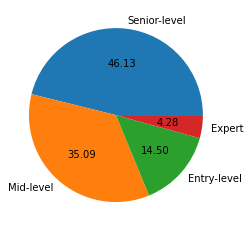

In [24]:
plt.pie(values, labels=labels, autopct='%.2f')
plt.show()

## TR'den 3 veri var

In [25]:
df_turkiye = df[df["company_location"]=="TR"]

In [26]:
df_turkiye.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
247,2021,Mid-level,Full-time,Data Engineer,108000,TRY,12103,TR,0,TR,M
268,2021,Mid-level,Full-time,Data Engineer,250000,TRY,28016,TR,100,TR,M
278,2021,Senior-level,Full-time,Data Scientist,180000,TRY,20171,TR,50,TR,L


## Bazı verilerin analizi

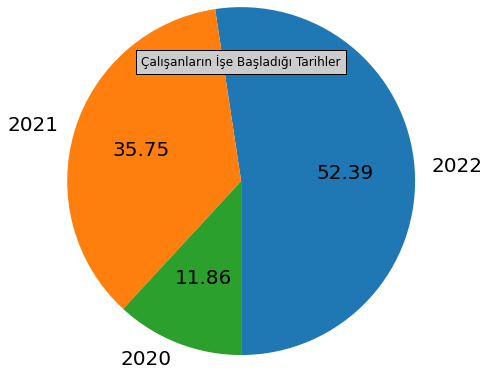

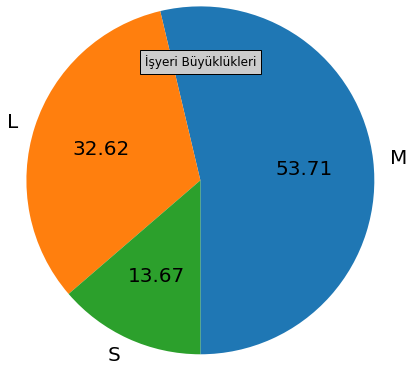

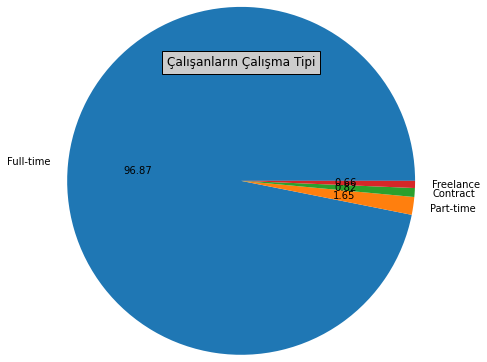

In [27]:
calısma = df.groupby("work_year")
df_calısma_sayi = pd.DataFrame(calısma.size().sort_values(ascending=False), 
                           columns = ["Sayı"])
comp = df.groupby("company_size")
df_comp_sayi = pd.DataFrame(comp.size().sort_values(ascending=False), 
                           columns = ["Sayı"])
emp = df.groupby("employment_type")
df_emp_sayi = pd.DataFrame(emp.size().sort_values(ascending=False), 
                           columns = ["Sayı"])
values1=df_calısma_sayi["Sayı"]
labels1=df_calısma_sayi.index
values2=df_comp_sayi["Sayı"]
labels2=df_comp_sayi.index
values3=df_emp_sayi["Sayı"]
labels3=df_emp_sayi.index
textprops = {"fontsize":20}
plt.figure(0)
plt.pie(values1, labels=labels1, radius = 2.0,startangle = 270,textprops =textprops ,autopct='%.2f')
plt.title("Çalışanların İşe Başladığı Tarihler", bbox={'facecolor':'0.8', 'pad':5})
plt.figure(1)
plt.pie(values2, labels=labels2, radius = 2.0,startangle = 270,textprops =textprops ,autopct='%.2f')
plt.title("İşyeri Büyüklükleri", bbox={'facecolor':'0.8', 'pad':5})
plt.figure(2)
plt.pie(values3, labels=labels3, radius = 2.0,textprops ={"fontsize":10} ,autopct='%.2f')
plt.title("Çalışanların Çalışma Tipi", bbox={'facecolor':'0.8', 'pad':5})

plt.show()


In [28]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid-level,Full-time,Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [29]:
df["experience_level"].unique()

array(['Mid-level', 'Senior-level', 'Entry-level', 'Expert'], dtype=object)

In [30]:
level = df["experience_level"].values
katagori = []
for _ in level:
    if _ == "Entry-level":
        katagori.append(0)
    elif _ =="Mid-level"  :
        katagori.append(1)
    elif _=="Senior-level" :
        katagori.append(2)
    
    else:
        katagori.append(3)
katagori = pd.DataFrame(data=katagori, columns=["Deneyim"])
data = pd.concat([df, katagori], axis=1)
data.drop(columns="experience_level", axis=1, inplace=True)

In [32]:
data["employment_type"].unique()

array(['Full-time', 'Contract', 'Part-time', 'Freelance'], dtype=object)

In [33]:
emp = data["employment_type"].values
katagori = []
for _ in emp:
    if _ == "Part-time":
        katagori.append(0)
    elif _ =="Contract"  :
        katagori.append(1)
    elif _=="Freelance" :
        katagori.append(2)
    
    else:
        katagori.append(3)
katagori = pd.DataFrame(data=katagori, columns=["calisma_tipi"])
data = pd.concat([data, katagori], axis=1)
data.drop(columns="employment_type", axis=1, inplace=True)

In [35]:
data["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

In [36]:
comp = data["company_size"].values
katagori = []
for _ in comp:
    if _ == "S":
        katagori.append(0)
    elif _ =="M"  :
        katagori.append(1)
    
    else:
        katagori.append(2)
katagori = pd.DataFrame(data=katagori, columns=["firma_buyuklugu"])
data = pd.concat([data, katagori], axis=1)
data.drop(columns="company_size", axis=1, inplace=True)

In [38]:
data.head(10)

,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,Deneyim,calisma_tipi,firma_buyuklugu
0,2020,Data Scientist,70000,EUR,79833,DE,0,DE,1,3,2
1,2020,Machine Learning Scientist,260000,USD,260000,JP,0,JP,2,3,0
2,2020,Big Data Engineer,85000,GBP,109024,GB,50,GB,2,3,1
3,2020,Data Analyst,20000,USD,20000,HN,0,HN,1,3,0
4,2020,Machine Learning Engineer,150000,USD,150000,US,50,US,2,3,2
5,2020,Data Analyst,72000,USD,72000,US,100,US,0,3,2
6,2020,Head of Data Science,190000,USD,190000,US,100,US,2,3,0
7,2020,Data Scientist,11000000,HUF,35735,HU,50,HU,1,3,2
8,2020,Business Data Analyst,135000,USD,135000,US,100,US,1,3,2
9,2020,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,2,3,0


In [39]:
data.dtypes

work_year              int64
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
Deneyim                int64
calisma_tipi           int64
firma_buyuklugu        int64
dtype: object

In [40]:
df = data.loc[:,["work_year","firma_buyuklugu","calisma_tipi","Deneyim","salary_in_usd"
                        ]]

In [41]:
df.head()

,work_year,firma_buyuklugu,calisma_tipi,Deneyim,salary_in_usd
0,2020,2,3,1,79833
1,2020,0,3,2,260000
2,2020,1,3,2,109024
3,2020,0,3,1,20000
4,2020,2,3,2,150000


In [42]:
df.shape

(607, 5)

## REGRESYON

In [43]:
y=np.array(df["salary_in_usd"])
X=np.array(df.drop("salary_in_usd",axis=1))

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
linear=LinearRegression()

In [52]:
linear.fit(X_train,y_train)

LinearRegression()

## ÇOK DUSUK SCORE ALDIM SEBEBİ OZNİTEKLERİN YETERSİZ OLMASI

In [54]:
linear.score(X_test,y_test)

0.21901356945437833

In [55]:
linear.score(X_train,y_train)

0.2540512979913504

In [57]:
df.head()

,work_year,firma_buyuklugu,calisma_tipi,Deneyim,salary_in_usd
0,2020,2,3,1,79833
1,2020,0,3,2,260000
2,2020,1,3,2,109024
3,2020,0,3,1,20000
4,2020,2,3,2,150000


In [61]:
yeni_veri=np.array([[2020,2,3,3]])
linear.predict(yeni_veri)

array([191811.25321645])